In [1]:
import tensorflow as tf
import keras
tf.__version__
keras.__version__



2026-02-08 14:40:11.558648: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'3.12.0'

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape


(60000, 28, 28)

In [4]:
X_valid, X_train  = X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid, y_train  = y_train_full[:5000],y_train_full[5000:]

In [5]:
class_names = ["T-shirt/top","Trouser", "Pullover","Dress","Coat","Sandal","Shirst", "Sneaker", "Bag","Ankle boot"]
class_names[y_train[0]]

'Coat'

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

/home/anle/miniconda3/envs/anle/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1770536415.178729   27592 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5592 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6


In [7]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28,28]),
keras.layers.Dense(300,activation="relu"),
keras.layers.Dense(100,activation="relu"),
keras.layers.Dense(10,activation="softmax")
])


/home/anle/miniconda3/envs/anle/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [10]:
hidden1 = model.layers[1]

In [12]:
weight, bias = hidden1.get_weights()

In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2026-02-08 15:21:47.316785: I external/local_xla/xla/service/service.cc:163] XLA service 0x7f81b4006c00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-02-08 15:21:47.316803: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2026-02-08 15:21:47.344897: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-02-08 15:21:47.408241: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002
2026-02-08 15:21:47.430450: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-02-08 15:21:47.430499: 

 100/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3396 - loss: 1.9898

I0000 00:00:1770538910.033207   27753 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1704/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6808 - loss: 1.0098

2026-02-08 15:21:52.589336: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-02-08 15:21:52.589387: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-02-08 15:21:53.160219: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_40', 36 bytes spill stores, 36 bytes spill loads



1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7633 - loss: 0.7248 - val_accuracy: 0.8172 - val_loss: 0.5371
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8318 - loss: 0.4855 - val_accuracy: 0.8476 - val_loss: 0.4409
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8465 - loss: 0.4402 - val_accuracy: 0.8592 - val_loss: 0.4151
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8572 - loss: 0.4129 - val_accuracy: 0.8622 - val_loss: 0.4065
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8635 - loss: 0.3932 - val_accuracy: 0.8674 - val_loss: 0.3799
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8673 - loss: 0.3777 - val_accuracy: 0.8604 - val_loss: 0.3904
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8722 - loss: 0.3648 - val_accuracy: 0.8710 - val_loss: 0.3607
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8750 - loss: 0.3522 - val_accurac

In [20]:
history.history

{'accuracy': [0.7632545232772827,
  0.831781804561615,
  0.8464545607566833,
  0.857200026512146,
  0.8634545207023621,
  0.8672909140586853,
  0.8721636533737183,
  0.874963641166687,
  0.8777636289596558,
  0.8825454711914062,
  0.883618175983429,
  0.8865636587142944,
  0.8883090615272522,
  0.8925091028213501,
  0.8937272429466248,
  0.8960727453231812,
  0.8981090784072876,
  0.9004545211791992,
  0.9017999768257141,
  0.9038545489311218,
  0.9056363701820374,
  0.9075272679328918,
  0.9088545441627502,
  0.909781813621521,
  0.9122545719146729,
  0.9131454825401306,
  0.9149636626243591,
  0.9174181818962097,
  0.9180545210838318,
  0.9196909070014954],
 'loss': [0.7248070240020752,
  0.48552078008651733,
  0.4402199685573578,
  0.4129100739955902,
  0.3932408392429352,
  0.377659410238266,
  0.3648075759410858,
  0.35216382145881653,
  0.342584490776062,
  0.333721399307251,
  0.3242381811141968,
  0.31672942638397217,
  0.30852657556533813,
  0.3025311529636383,
  0.29547870159

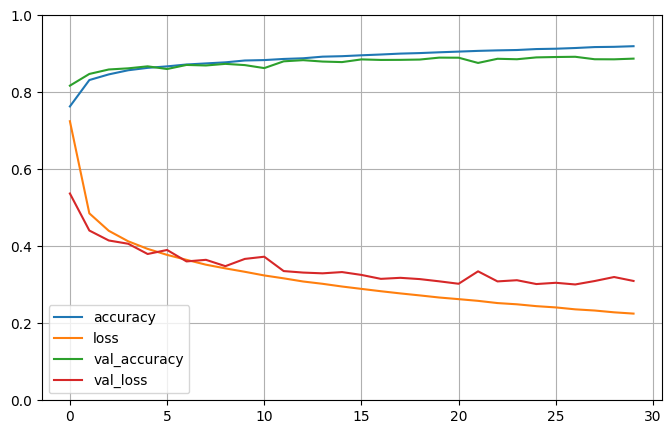

In [19]:
import pandas as pd

import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()